# Project Behavioral Cloning

## 1 Import Required Libraries

In [1]:
import csv
#from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import numpy as np
from keras.models import Sequential
from keras.layers import Flatten, Dense, Lambda
from keras.layers.core import Dense, Activation, Flatten
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.core import Dropout
from keras.layers.convolutional import Cropping2D

%matplotlib inline

Using TensorFlow backend.


In [2]:
def display(image):
    plt.imshow(image)
    plt.show()

# 2 Preparing Data

In [3]:
lines = []
#with open('data_as_shipped/driving_log.csv') as csvfile:
with open('./data_FK/driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        lines.append(line)

In [4]:
#Show format of 'line'
line

['center_2016_12_01_13_46_38_947.jpg',
 ' left_2016_12_01_13_46_38_947.jpg',
 ' right_2016_12_01_13_46_38_947.jpg',
 ' 0',
 ' 0',
 ' 0',
 ' 1.374433']

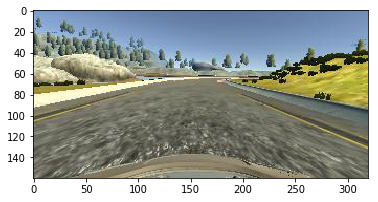

In [5]:
# Display Image File for verification
folder_file='data_FK/IMG/'+line[0]
folder_file
img=mpimg.imread(folder_file)
#plt.imshow(img)
#plt.show()
display(img)

In [7]:
images=[]
measurements=[]
for line in lines:
    source_path=line[0]
    filename = source_path.split('/')[-1]
    current_path = './data_FK/IMG/'+filename
    image = cv2.imread(current_path)
    images.append(image)
    measurement=float(line[3])
    measurements.append(measurement)
    image_flipped=np.fliplr(image)
    images.append(image_flipped)
    measurements.append(-measurement) 

In [8]:
X_train=np.array(images)
y_train=np.array(measurements)

In [9]:
np.shape(X_train), np.shape(y_train)

((19074, 160, 320, 3), (19074,))

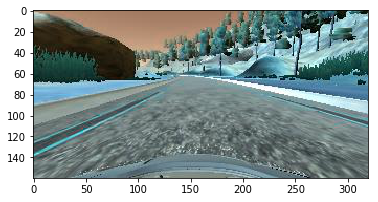

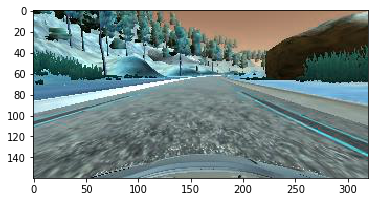

In [9]:
# Display Image File for verification
np.shape(X_train)
img=X_train[0]
display(img)
img=X_train[1]
display(img)

# 3 Neural Network

## 3.1 Starting Model 

In [10]:
#For multiline comment press Ctrl+#
# model=Sequential()
# model.add(Lambda (lambda x: x/255-0.5,input_shape=(160,320,3)))
# model.add(Flatten())
# model.add(Dense(1))

# model.compile(loss='mse',optimizer='adam')
# model.fit(X_train, y_train, validation_split=0.2, shuffle=True, nb_epoch=7)
# model.save('model.h5')
# exit()

## 3.2 Model based on Nvidia Architecture

In [11]:
model=Sequential()
model.add(Lambda (lambda x: x/255-0.5,input_shape=(160,320,3)))
model.add(Cropping2D(cropping=((70,25),(0,0))))
model.add(Convolution2D(24,5,5,subsample=(2,2),activation="relu"))
model.add(Convolution2D(36,5,5,subsample=(2,2),activation="relu"))
model.add(Convolution2D(48,5,5,subsample=(2,2),activation="relu"))
model.add(Convolution2D(64,3,3,activation="relu"))
model.add(Convolution2D(64,3,3,activation="relu"))
model.add(Flatten())
model.add(Dense(100))
model.add(Dense(50))
model.add(Dense(10))
model.add(Dense(1))

In [ ]:
model.compile(loss='mse',optimizer='adam')
model.fit(X_train, y_train, validation_split=0.2, shuffle=True, nb_epoch=3)
model.save('model.h5')
exit()

Train on 15259 samples, validate on 3815 samples
Epoch 1/3
15259/15259 [==============================] - 233s - loss: 0.0123 - val_loss: 0.0103

# 4 Testing of Neural Network

In [ ]:
#python drive.py model.h5